# 통계분석

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.stattools import durbin_watson

1.&nbsp; 종속변수인 Chance_of_Admit(입학 허가 확룔)와 독립변수(GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석을 수행하고 그래프를 이용하여 분석결과를 설명하시오.

In [2]:
data_path = '/hdd/data/adp_data/Admission.csv'
df = pd.read_csv(data_path)
df.head()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
variables = ['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Chance_of_Admit']
corr_matrix = df[variables].corr(method = 'pearson')
corr_matrix

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Chance_of_Admit
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.791594
Univ_Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.873289
Chance_of_Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,1.000000


In [4]:
def calculate_pearson_pvalues(df, variables):
    pvalues = pd.DataFrame(index = variables, columns = variables)
    for var1 in variables:
        for var2 in variables:
            if var1 == var2:
                pvalues.loc[var1, var2] = 0.0
            else:
                corr, pval = pearsonr(df[var1], df[var2])
                pvalues.loc[var1, var2] = pval
    
    return pvalues.astype(float)

pvalue_metrix = calculate_pearson_pvalues(df, variables)
pvalue_metrix

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Chance_of_Admit
GRE,0.000000e+00,9.011247e-106,3.123351e-53,1.303288e-42,4.735483e-34,2.198060e-104,2.458112e-91
TOEFL,9.011247e-106,0.000000e+00,3.994228e-59,5.682291e-51,1.663023e-35,3.134310e-102,3.634102e-87
Univ_Rating,3.123351e-53,3.994228e-59,0.000000e+00,5.164732e-69,2.096820e-51,2.075992e-72,6.635019e-63
SOP,1.303288e-42,5.682291e-51,5.164732e-69,0.000000e+00,1.148760e-67,1.193420e-64,1.141095e-54
LOR,4.735483e-34,1.663023e-35,2.096820e-51,1.148760e-67,0.000000e+00,1.716421e-53,2.007315e-53
CGPA,2.198060e-104,3.134310e-102,2.075992e-72,1.193420e-64,1.716421e-53,0.000000e+00,2.336514e-126
Chance_of_Admit,2.458112e-91,3.634102e-87,6.635019e-63,1.141095e-54,2.007315e-53,2.336514e-126,0.000000e+00


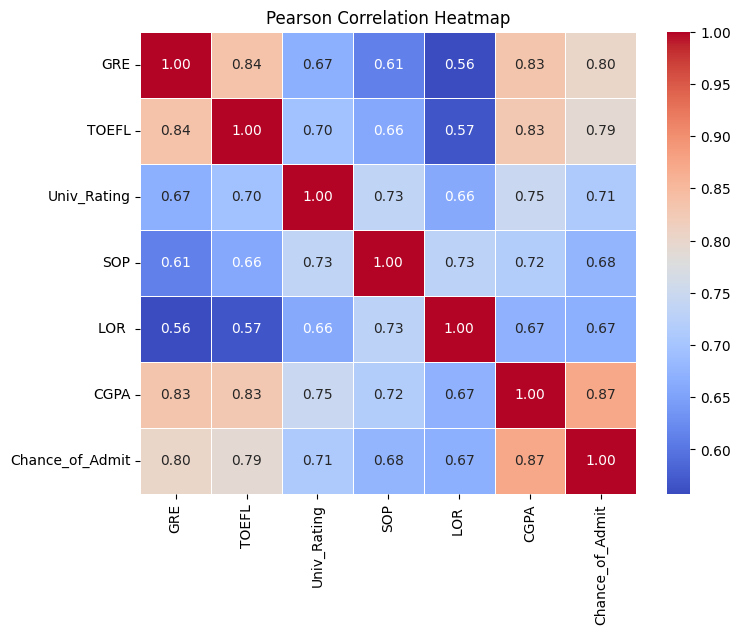

In [5]:
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

2.&nbsp; GRE, TOEFL, Univ_Raing, SOP, LOR, CGPA, Reasearch가 Chance_of_Admit에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [8]:
X = df[['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance_of_Admit']
X = sm.add_constant(X)

In [9]:
def stepwise_selection(X, y, p_value_threshold = 0.05):
    selected_vars = list(X.columns)
    while True:
        model = sm.OLS(y, X[selected_vars]).fit()
        p_values = model.pvalues
        max_p_value = p_values.drop('const').max()
        if max_p_value > p_value_threshold:
            excluded_var = p_values.drop('const').idxmax()
            selected_vars.remove(excluded_var)
        else:
            break
    
    return model, selected_vars

model, selected_features = stepwise_selection(X, y)

print('Selected Features: ', selected_features)
print(model.summary())

Selected Features:  ['const', 'GRE', 'TOEFL', 'LOR ', 'CGPA', 'Research']
                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Sun, 30 Mar 2025   Prob (F-statistic):          2.04e-136
Time:                        13:29:41   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

3.&nbsp; 단계적 선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 잔차분석을 수행하고, 그래프를 활용하여 결과를 해석하시오.

In [11]:
residuals = model.resid
fitted_values = model.fittedvalues

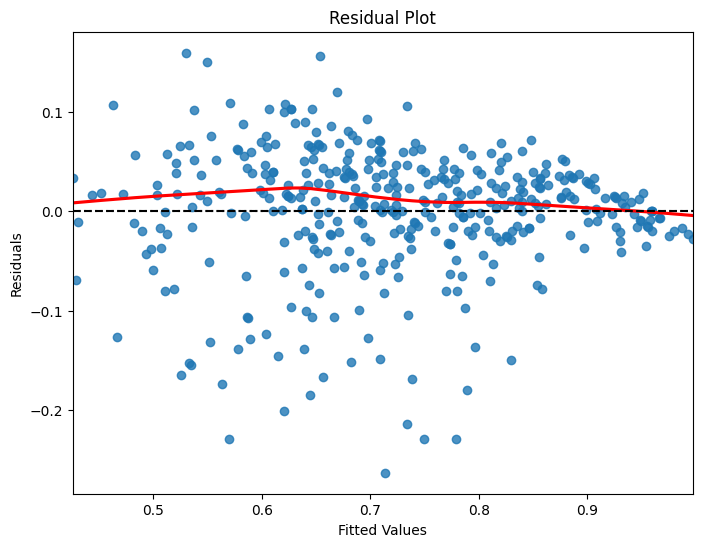

In [13]:
plt.figure(figsize = (8, 6))
sns.residplot(x = fitted_values, y = residuals, lowess = True, line_kws = {'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.show()

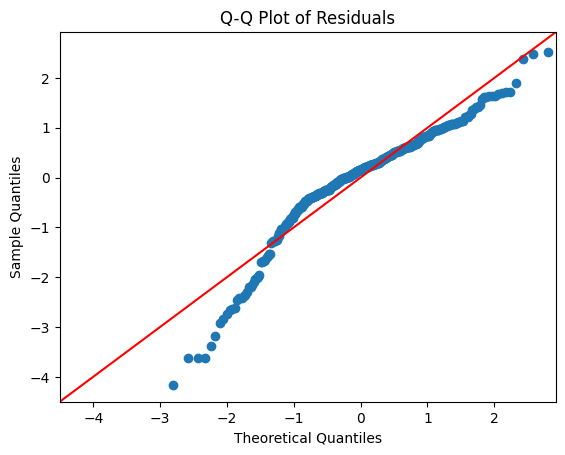

In [14]:
sm.qqplot(residuals, line = '45', fit = True)
plt.title("Q-Q Plot of Residuals")
plt.show()

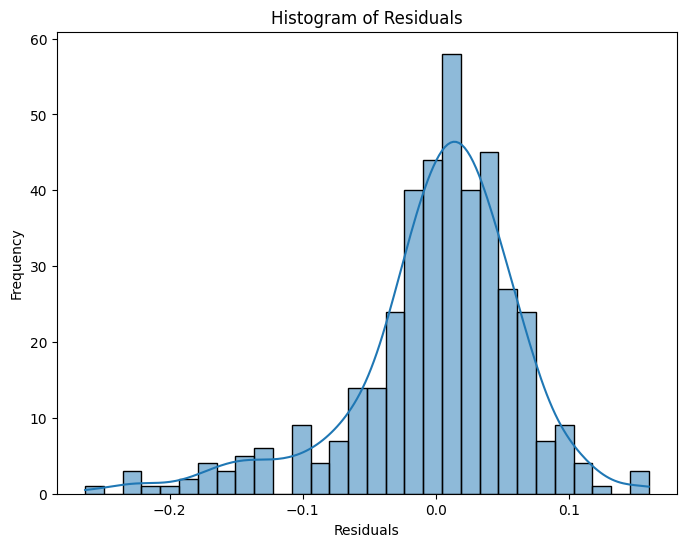

In [15]:
plt.figure(figsize = (8, 6))
sns.histplot(residuals, kde = True, bins = 30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [17]:
dw_stat = durbin_watson(residuals)
print(f'Durbin Watson Statistics: {dw_stat}')

Durbin Watson Statistics: 0.7499111207304139
